In [3]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

In [8]:
results_folder = os.path.abspath('../simulation_study/perl/results')
methods = ['smc', 'prune']
models = ['model1']
sizes = [5000, 10000, 20000]
correct_model = '000 1 10 100'
df = None
for model in models:
    for method in methods:
        for size in sizes:
            filename = '%s/%s/%s_%s.csv' % (results_folder, method, model, size)
            if df is None:
                df = pd.read_csv(filename)
                df['size'] = size
            else:
                df2 = pd.read_csv(filename)
                df2['size'] = size
                df = df.append(df2)
df.tree = df.tree.astype(str).map(lambda t: ' '.join(sorted(t.split())))
df['found'] = 0
df['identified'] = 0
df.loc[df.tree == correct_model, 'found'] = 1
df.loc[(df.opt == 1) & (df.tree == correct_model), 'identified'] = 1
results = df.groupby(['model_name', 'method', 'size']).sum()[['found', 'identified']].reset_index(drop=False)
results_m1 = results[results.model_name == 'model1']
#results_m2 = results[results.model_name == 'model2']

## Model 1

In [9]:
results_m1[results_m1.method=='smc']

,model_name,method,size,found,identified
3,model1,smc,5000,70,29
4,model1,smc,10000,80,43
5,model1,smc,20000,96,79


In [144]:
results_m1[results_m1.method=='SeqROCTM']

,model_name,method,size,found,identified
0,model1,SeqROCTM,5000,37,27
1,model1,SeqROCTM,10000,55,37
2,model1,SeqROCTM,20000,89,75


In [10]:
results_m1[results_m1.method=='prune']

,model_name,method,size,found,identified
0,model1,prune,5000,81,28
1,model1,prune,10000,85,41
2,model1,prune,20000,96,77


In [146]:
results_m2[results_m2.method=='smc']

,model_name,method,size,found,identified
12,model2,smc,5000,76,58
13,model2,smc,10000,92,85
14,model2,smc,20000,58,0


In [147]:
results_m2[results_m2.method=='prune']

,model_name,method,size,found,identified
9,model2,prune,5000,82,57
10,model2,prune,10000,45,42
11,model2,prune,20000,100,0


In [148]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fig(results, methods):
    plt.figure(figsize=(14, 4))
    for i, method in enumerate(methods):
        plt.subplot(1, len(methods), i+1)
        r = results[results.method==method]
        ind = np.arange(len(r))
        width = 0.25
        p2 = plt.bar(ind, r.found, width)    
        p1 = plt.bar(ind, r.identified, width)

        plt.ylabel('Scores')
        plt.title(method)
        plt.xticks(ind, r['size'])
        plt.yticks(np.arange(0, 100, 10))
        plt.legend((p1[0], p2[0]), ('Identified', 'Among champions'))
    plt.show()

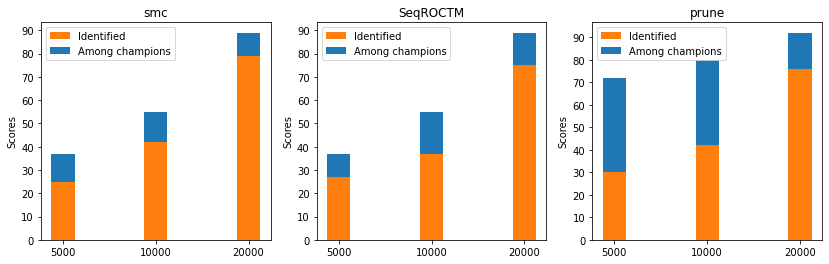

In [149]:
plot_fig(results_m1, methods)

In [139]:
#plot_fig(results_m2, ['smc', 'prune'])